In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from scipy.stats import distributions, multivariate_normal

# import fitter
from HMC import HMC

import sys
sys.path.append("..")
from MCMC_DianZhang.Dian_MCMC.Statistic_tools import auto_corr_plot, targetDis_step_plot

In [2]:
from scipy.stats import multivariate_normal
from scipy.interpolate import griddata
#from scipy.optimize import curve_fit
from sklearn.mixture import GaussianMixture
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from HMC import HMC
from GMM_Likelihoods import GaussianMixtureModel

In [3]:
dimensions = 2
components = 2
means = [[1, 1], [5, 5]]
covs = [[[1, 0], [0, 1]], 
        [[2, 0], [0, 2]]]
weights = [0.3, 0.7]

In [4]:
gmm1 = GaussianMixtureModel(n_dimensions = dimensions, 
                            n_components = components, 
                            means = means, 
                            covs = covs, 
                            weights = weights)

In [5]:
n_samples = 200
noise = 0.2
X1, noisy_data1 = gmm1.generate_data(n_samples, noise_scale = noise)

In [ ]:
gmm1.plot_scatter(X1)
gmm1.plot_scatter(noisy_data1)
gmm1.plot_histograms(X1,noise_scale=noise)

In [7]:
logLikeli = gmm1.calculate_log_likelihoods_mu

In [8]:
logLikeli([[1, 1], [5, 5]])

-834.505863642059

In [9]:
def U(theta: List[float]) -> float:
    '''
    the potential energy function: 
    U(theta) = -log(probability distribution of theta)
    '''
    return - logLikeli(theta)

def grad_U(theta: List[float]) -> float:
    '''
    the derivative of the potential energy function
    dU/dmu
    '''
    DRho = gmm1.dfdx(theta)
    Rho = - logLikeli(theta)
    return np.array([dRho/Rho for dRho in DRho])

In [10]:
theta_accept, theta_reject = HMC(epoch=3000, L=20, epsilon=0.01, U=U, grad_U=grad_U, current_theta=np.array([0,0,0,0]))

In [11]:
print("acceptance rate =", len(theta_accept)/(len(theta_accept)+len(theta_reject)))

acceptance rate = 0.21233333333333335


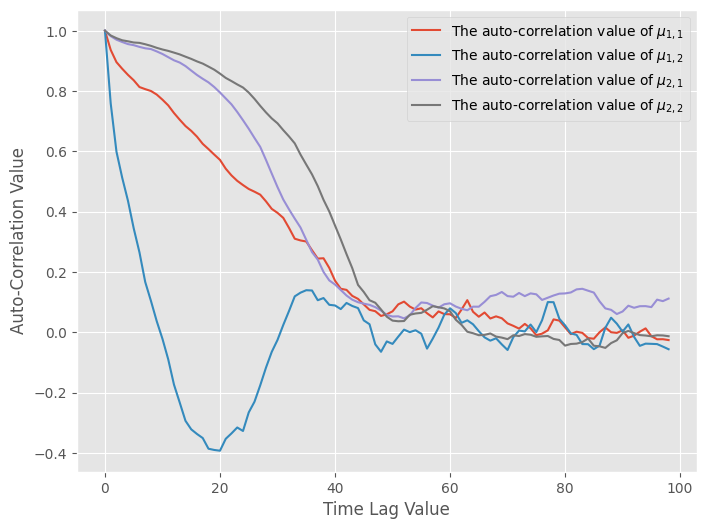

In [12]:
auto_corr_plot(theta_accept, plot_nth_theta=[0,1,2,3],theta_index=['$\mu_{1,1}$','$\mu_{1,2}$','$\mu_{2,1}$','$\mu_{2,2}$'],data_range=[0,3000],figsize=[8,6])

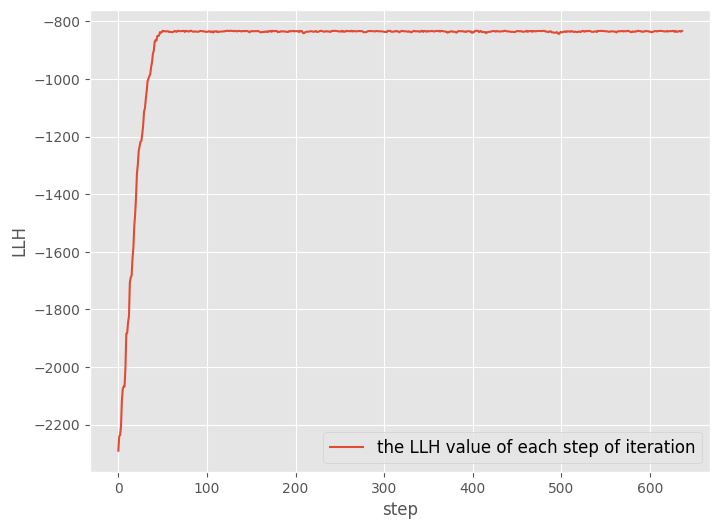

In [13]:
targetDis_step_plot(thetas=theta_accept, rho=logLikeli, target_type="LLH", figsize=(8, 6))